# Import Libraries

First, we import the libraries needed for data manipulation, visualization, statistical analysis, and machine learning model.

In [1]:
# Libraries for data manipulation, computation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for statistical analysis 
from scipy.stats import chi2_contingency, mannwhitneyu

# Libraries for machine learning model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Libraries for metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Libraries for saving the model
import pickle

# Import Data

In this part, we're going to import the dataset (diabetes_risk_prediction_dataset.csv) and check the datset's condition. 

In [2]:
# Get the data from 'Data' folder
df = pd.read_csv('Data\diabetes_risk_prediction_dataset.csv')

In [3]:
# Take a glimpse look on the data
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
337,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
124,38,Male,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Positive
34,49,Male,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
393,51,Female,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
46,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Positive
64,45,Female,No,No,No,No,No,No,Yes,Yes,No,No,Yes,No,No,No,Positive
483,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
167,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
180,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive


In [4]:
# Check the size of df
print(f'The shape of the data: {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the data: 520 rows and 17 columns


In [5]:
# Check the data type of each column
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
# Check the number of null data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

The non-null values that are detected by df.info() only include 'Null' and 'NaN'. However, how can we be sure that these are the only type of missing values in our dataset?

We're going to see deeper about the variety of values that we have in the dataset.

In [7]:
# Check the value of each column in more detail
for col in df.columns:
    print(f'========== {col} ==========')
    print(df[col].value_counts())
    print()

========== Age ==========
Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: count, dtype: int64

========== Gender ==========
Gender
Male      328
Female    192
Name: count, dtype: int64

========== Polyuria ==========
Polyuria
No     262
Yes    258
Name: count, dtype: int64

========== Polydipsia ==========
Polydipsia
No     287
Yes    233
Name: count, dtype: int64

========== sudden weight loss ==========
sudden weight loss
No     303
Yes    217
Name: count, dtype: int64

========== weakness ==========
weakness
Yes    305
No     215
Name: count, dtype: int64

========== Po

From the result above, we see that there isn't any kind of missing values in our data.

# Exploratory Data Analysis

In EDA section, we're going to understand our data deeper by doing some statistical analysis and hypothesis testing, providing some insights about the relation between the features and the target.

First, let's see the distribution of our target variable ('class') to determine whether our dataset is imbalanced or not.

C:\Users\Joshia\AppData\Local\Temp\ipykernel_4056\1632225663.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=['darkslategrey','Forestgreen'], ax=axs[0])


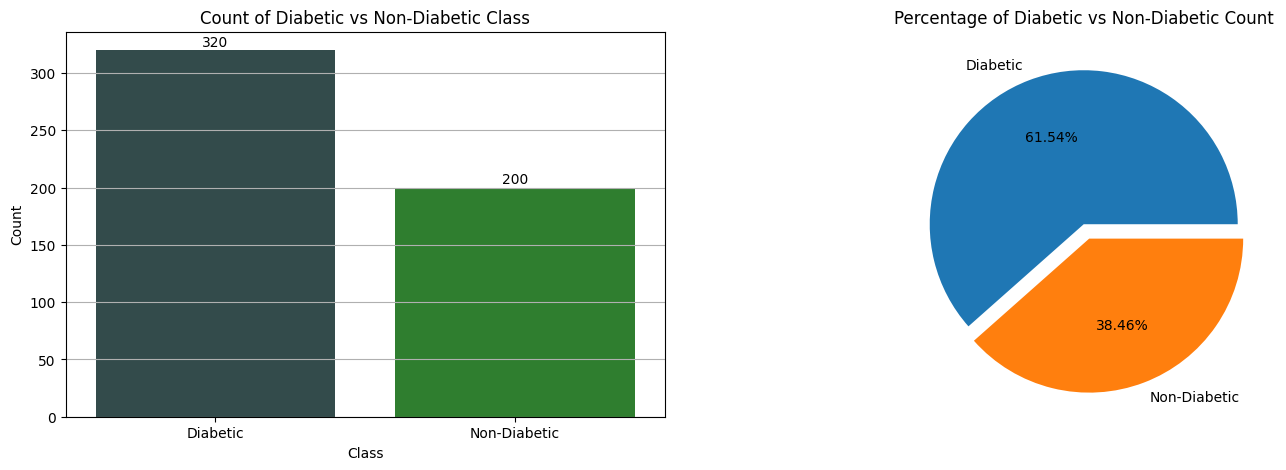

In [8]:
# Check the distribution of class
x = df['class'].value_counts().index
y = df['class'].value_counts().values

# Plot image
# Create the template
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]}, figsize=(17,5))

# 1st image: Barplot
sns.barplot(x=x, y=y, palette=['darkslategrey','Forestgreen'], ax=axs[0])
for i, v in enumerate(y):
    axs[0].text(i, v + 1, str(v), ha='center', va='bottom')
axs[0].set_title('Count of Diabetic vs Non-Diabetic Class')
axs[0].set_xlabel('Class')
axs[0].set_xticks(['Positive','Negative'],['Diabetic','Non-Diabetic'])
axs[0].set_ylabel('Count')
axs[0].yaxis.grid(True)

# 2nd image: Pie Chart
axs[1].pie(x=y, labels=['Diabetic','Non-Diabetic'], explode=[0,0.1], autopct='%1.2f%%')
axs[1].set_title('Percentage of Diabetic vs Non-Diabetic Count')

plt.show()

Both of the images show that our dataset isn't imbalanced, as the ratio between positive ('Diabetic') and negative ('Non-Diabetic) labels is around 5:8. 

## Some Basic EDA

Next, we're going to check some basic statistics regarding the dataset. This include the summary info of numerical column ("Age") and categorical columns.

In [9]:
# Check the description of "Age" column
df.describe().round(3)

,Age
count,520.000
mean,48.029
std,12.151
min,16.000
25%,39.000
50%,47.500
75%,57.000
max,90.000


Here we got some age-related information, like the minimum, mean, and maximum age in the dataset are 16, 48, and 90 respectively.

In [10]:
# Check the description of other categorical columns
df.describe(include='O')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


## Some Hypothesis Testing (Categorical Columns)

Next, we're going to check the association of each categorical feature ('Gender', 'Polyuria', ..., 'Obesity') with the target ('class') using Chi-Square Test of Independence. 


Chi-Square Test of Independence is a non-parametric test to determine whether two categorical variables are related. It works by comparing the observed frequencies to the frequencies that we'd expect if the two variabls are unrelated.

You can visit this [link](https://www.scribbr.com/statistics/chi-square-test-of-independence/) for a fantastic explanation about Chi-Square test by Shaun Turney.

In [11]:
# Define the function for Chi-Square hyphotesis testing
def chi2test(first_feature, second_feature='class', alpha=0.05):
    
    # Create visualization of the features
    plt.figure(figsize=(8,5))
    ax = sns.countplot(data=df, x=first_feature, hue=second_feature)
    for p in ax.patches:
        if p.get_height() != 0:
            ax.annotate(f'{str(int(p.get_height()))}', (p.get_x() + p.get_width()/2, p.get_height() + 3), 
                        ha='center', va='center')
    ax.set_title(f'Count of {first_feature} by {second_feature}')
    ax.legend(['Diabetic','Non-Diabetic'])
    ax.yaxis.grid(True)
    plt.show()

    # Create the contingency table
    contingency_table = pd.crosstab(df[first_feature], df[second_feature])
    contingency_table.columns = ['Non-Diabetic','Diabetic']
    print('Contingency Table (Observed Frequencies):')
    display(contingency_table)
    print()

    # Chi2 test to determine whehter both variables are independent of each other
    res = chi2_contingency(contingency_table)
    test_statistic = res.statistic
    p_value = res.pvalue
    expected_freuqency = res.expected_freq

    print('Expected Frequencies Table:')
    display(pd.DataFrame(expected_freuqency, index=contingency_table.index, columns=contingency_table.columns))
    print()

    print('========== Testing H0 vs H1 ==========')
    print(f'H0: The variable {first_feature} and the target {second_feature} are not related.')
    print(f'H1: The variable {first_feature} and the target {second_feature} are related.')
    print()

    print('Test statistic:', test_statistic)
    print('p-value:', p_value)

    # Determine whether to reject the null hypothesis or not
    if p_value < alpha:
        print('Reject the Null Hypothesis')
    else:
        print("Do not reject the Null Hypothesis as there isn't enough evidence to reject it.")
    
    # Determine the level of association between the 2 fields/variables
    n = contingency_table.sum().sum()
    v = np.sqrt(test_statistic / (n * (min(contingency_table.shape) - 1)))
    print('Cramers v value:', v)

In [12]:
# Get the columns names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

### Gender and Class

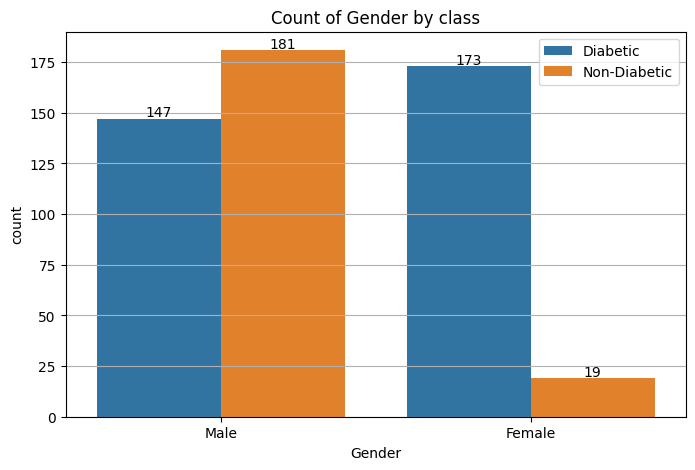

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Gender,,
Female,19,173
Male,181,147



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Gender,,
Female,73.846154,118.153846
Male,126.153846,201.846154



========== Testing H0 vs H1 ==========
H0: The variable Gender and the target class are not related.
H1: The variable Gender and the target class are related.

Test statistic: 103.03685927972559
p-value: 3.289703730553294e-24
Reject the Null Hypothesis
Cramers v value: 0.4451379632284407


In [13]:
chi2test('Gender', 'class')

### Polyuria and Class

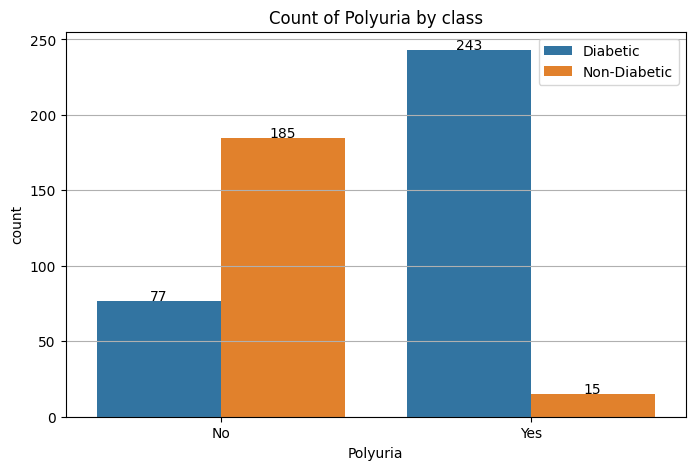

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Polyuria,,
No,185,77
Yes,15,243



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Polyuria,,
No,100.769231,161.230769
Yes,99.230769,158.769231



========== Testing H0 vs H1 ==========
H0: The variable Polyuria and the target class are not related.
H1: The variable Polyuria and the target class are related.

Test statistic: 227.86583895496773
p-value: 1.7409117803442155e-51
Reject the Null Hypothesis
Cramers v value: 0.6619694377022711


In [14]:
chi2test('Polyuria')

### Polydipsia and Class

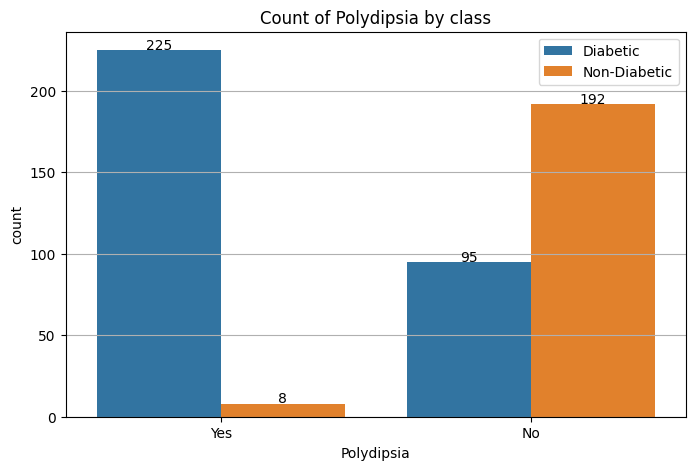

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Polydipsia,,
No,192,95
Yes,8,225



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Polydipsia,,
No,110.384615,176.615385
Yes,89.615385,143.384615



========== Testing H0 vs H1 ==========
H0: The variable Polydipsia and the target class are not related.
H1: The variable Polydipsia and the target class are related.

Test statistic: 216.17163269578742
p-value: 6.1870096408863144e-49
Reject the Null Hypothesis
Cramers v value: 0.6447593956361781


In [15]:
chi2test('Polydipsia')

### Sudden Weight Loss and Class

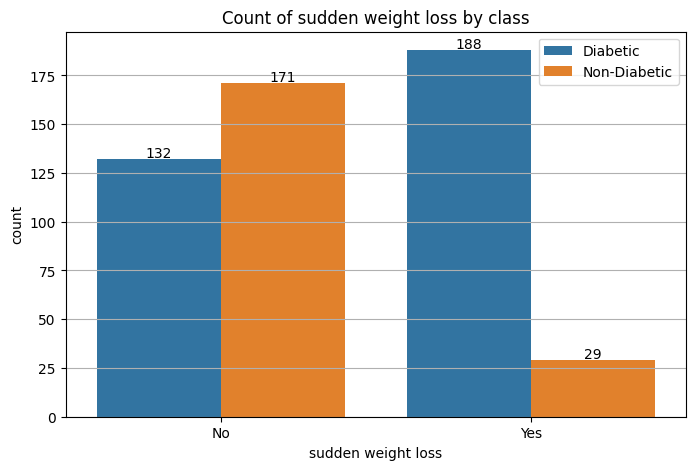

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
sudden weight loss,,
No,171,132
Yes,29,188



Expected Frequencies Table:


,Non-Diabetic,Diabetic
sudden weight loss,,
No,116.538462,186.461538
Yes,83.461538,133.538462



========== Testing H0 vs H1 ==========
H0: The variable sudden weight loss and the target class are not related.
H1: The variable sudden weight loss and the target class are related.

Test statistic: 97.29630347827408
p-value: 5.969166262549937e-23
Reject the Null Hypothesis
Cramers v value: 0.4325601413904867


In [16]:
chi2test('sudden weight loss')

### Weakness and Class

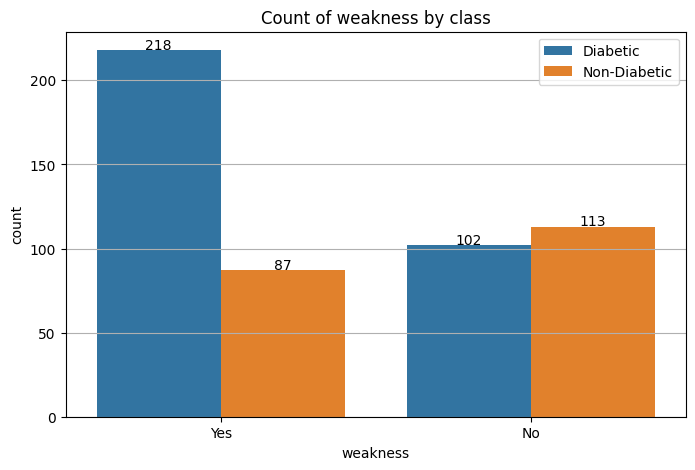

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
weakness,,
No,113,102
Yes,87,218



Expected Frequencies Table:


,Non-Diabetic,Diabetic
weakness,,
No,82.692308,132.307692
Yes,117.307692,187.692308



========== Testing H0 vs H1 ==========
H0: The variable weakness and the target class are not related.
H1: The variable weakness and the target class are related.

Test statistic: 29.767918414029744
p-value: 4.869843446585541e-08
Reject the Null Hypothesis
Cramers v value: 0.23926135699284412


In [17]:
chi2test('weakness')

### Polyphagia and Class

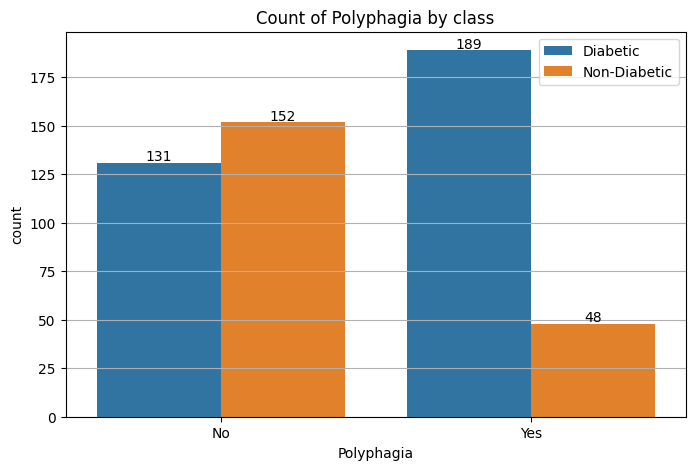

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Polyphagia,,
No,152,131
Yes,48,189



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Polyphagia,,
No,108.846154,174.153846
Yes,91.153846,145.846154



========== Testing H0 vs H1 ==========
H0: The variable Polyphagia and the target class are not related.
H1: The variable Polyphagia and the target class are related.

Test statistic: 59.595253537296315
p-value: 1.1651584346409135e-14
Reject the Null Hypothesis
Cramers v value: 0.33853545870778873


In [18]:
chi2test('Polyphagia')

### Genital thrush and Class

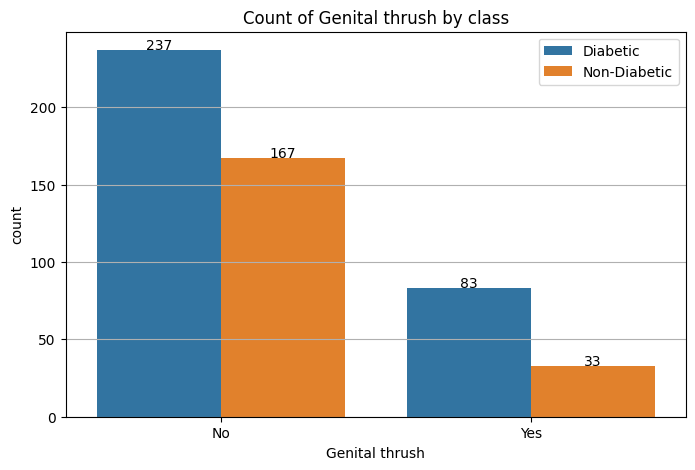

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Genital thrush,,
No,167,237
Yes,33,83



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Genital thrush,,
No,155.384615,248.615385
Yes,44.615385,71.384615



========== Testing H0 vs H1 ==========
H0: The variable Genital thrush and the target class are not related.
H1: The variable Genital thrush and the target class are related.

Test statistic: 5.792148557528164
p-value: 0.016097902991938178
Reject the Null Hypothesis
Cramers v value: 0.10554026353016037


In [19]:
chi2test('Genital thrush')

### Visual blurring and Class

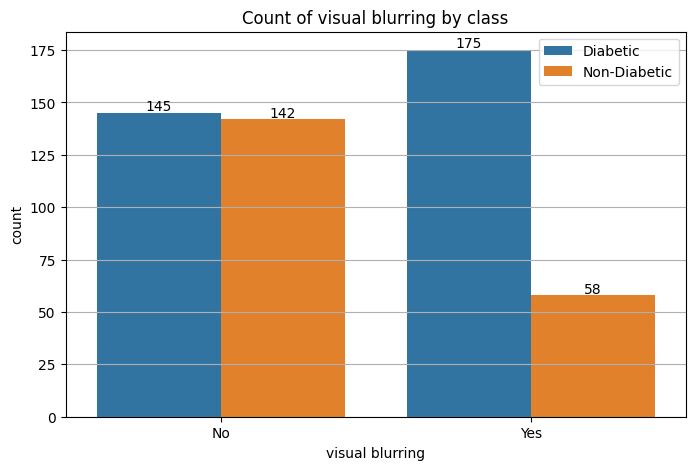

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
visual blurring,,
No,142,145
Yes,58,175



Expected Frequencies Table:


,Non-Diabetic,Diabetic
visual blurring,,
No,110.384615,176.615385
Yes,89.615385,143.384615



========== Testing H0 vs H1 ==========
H0: The variable visual blurring and the target class are not related.
H1: The variable visual blurring and the target class are related.

Test statistic: 31.808455832872244
p-value: 1.7015036753241196e-08
Reject the Null Hypothesis
Cramers v value: 0.2473259132620522


In [20]:
chi2test('visual blurring')

### Itching and Class

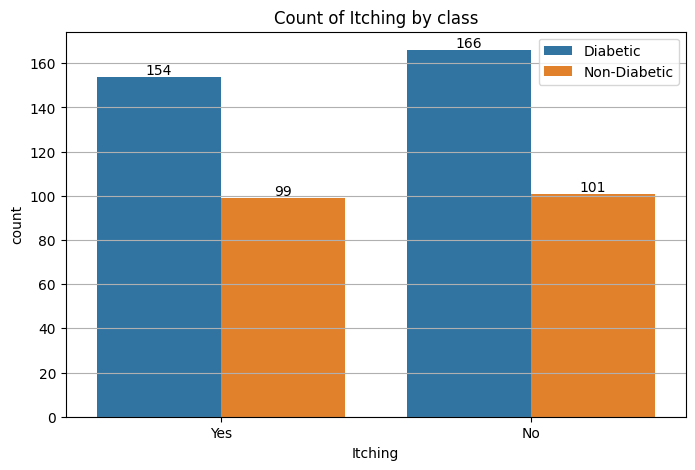

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Itching,,
No,101,166
Yes,99,154



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Itching,,
No,102.692308,164.307692
Yes,97.307692,155.692308



========== Testing H0 vs H1 ==========
H0: The variable Itching and the target class are not related.
H1: The variable Itching and the target class are related.

Test statistic: 0.046235436929134684
p-value: 0.8297483959485009
Do not reject the Null Hypothesis as there isn't enough evidence to reject it.
Cramers v value: 0.009429438041940647


In [21]:
chi2test('Itching')

### Irritability and Class

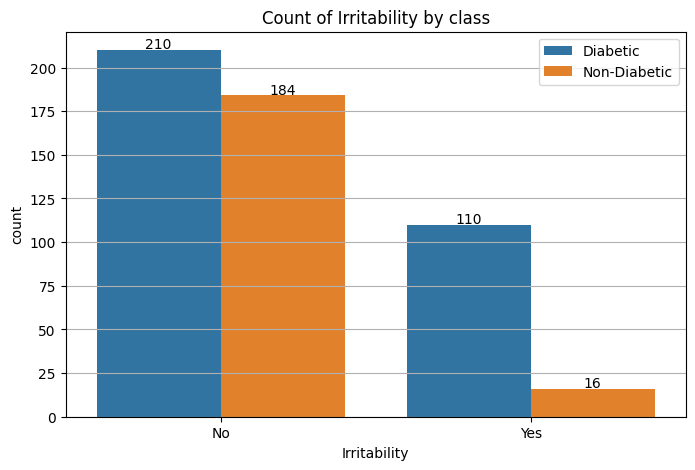

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Irritability,,
No,184,210
Yes,16,110



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Irritability,,
No,151.538462,242.461538
Yes,48.461538,77.538462



========== Testing H0 vs H1 ==========
H0: The variable Irritability and the target class are not related.
H1: The variable Irritability and the target class are related.

Test statistic: 45.2083484408992
p-value: 1.7714831493959365e-11
Reject the Null Hypothesis
Cramers v value: 0.2948544244489369


In [22]:
chi2test('Irritability')

### Delayed healing and Class

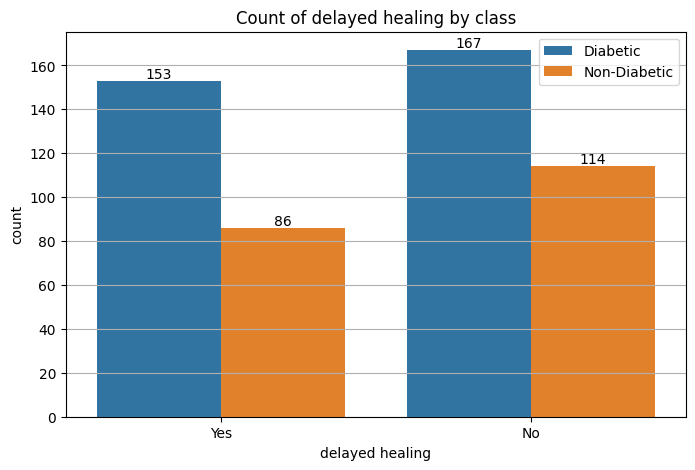

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
delayed healing,,
No,114,167
Yes,86,153



Expected Frequencies Table:


,Non-Diabetic,Diabetic
delayed healing,,
No,108.076923,172.923077
Yes,91.923077,147.076923



========== Testing H0 vs H1 ==========
H0: The variable delayed healing and the target class are not related.
H1: The variable delayed healing and the target class are related.

Test statistic: 0.962093688113284
p-value: 0.32665993771439955
Do not reject the Null Hypothesis as there isn't enough evidence to reject it.
Cramers v value: 0.04301372071151975


In [23]:
chi2test('delayed healing')

### Partial paresis and Class

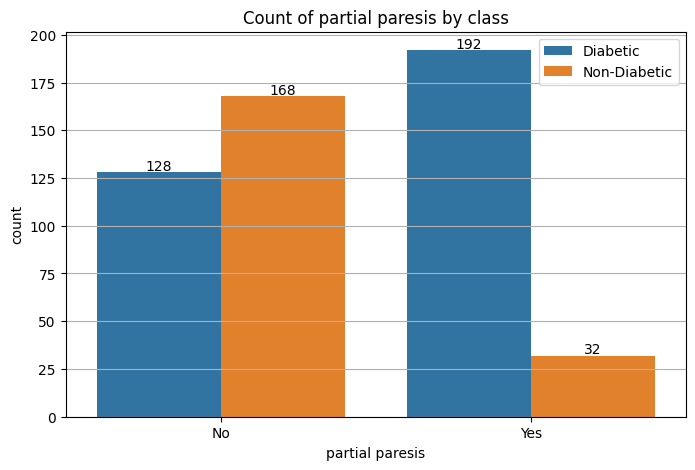

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
partial paresis,,
No,168,128
Yes,32,192



Expected Frequencies Table:


,Non-Diabetic,Diabetic
partial paresis,,
No,113.846154,182.153846
Yes,86.153846,137.846154



========== Testing H0 vs H1 ==========
H0: The variable partial paresis and the target class are not related.
H1: The variable partial paresis and the target class are related.

Test statistic: 95.38762744329154
p-value: 1.565289071056334e-22
Reject the Null Hypothesis
Cramers v value: 0.42829632858950933


In [24]:
chi2test('partial paresis')

### Muscle stiffness and Class

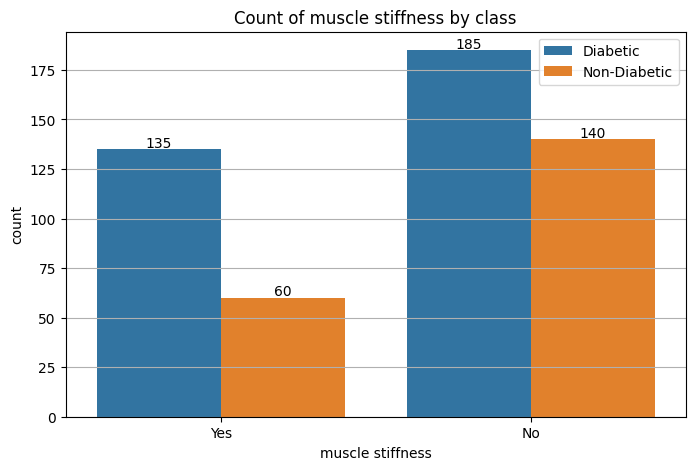

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
muscle stiffness,,
No,140,185
Yes,60,135



Expected Frequencies Table:


,Non-Diabetic,Diabetic
muscle stiffness,,
No,125.0,200.0
Yes,75.0,120.0



========== Testing H0 vs H1 ==========
H0: The variable muscle stiffness and the target class are not related.
H1: The variable muscle stiffness and the target class are related.

Test statistic: 7.288666666666666
p-value: 0.006939095697923978
Reject the Null Hypothesis
Cramers v value: 0.11839200423452027


In [25]:
chi2test('muscle stiffness')

### Alopecia and Class

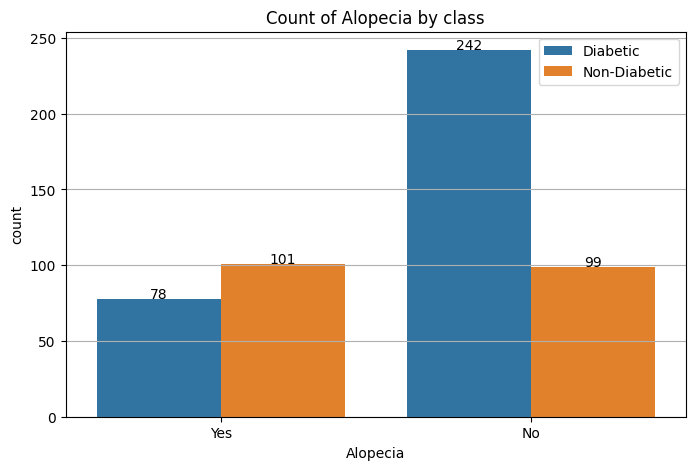

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Alopecia,,
No,99,242
Yes,101,78



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Alopecia,,
No,131.153846,209.846154
Yes,68.846154,110.153846



========== Testing H0 vs H1 ==========
H0: The variable Alopecia and the target class are not related.
H1: The variable Alopecia and the target class are related.

Test statistic: 36.064143416504216
p-value: 1.9092794963633994e-09
Reject the Null Hypothesis
Cramers v value: 0.26335170771197935


In [26]:
chi2test('Alopecia')

### Obesity and Class

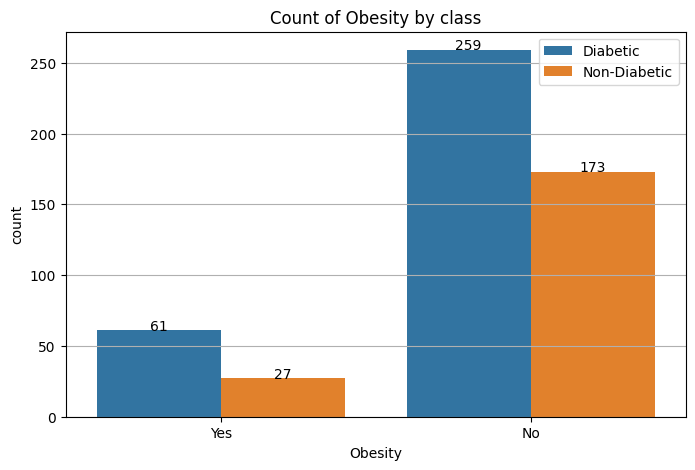

Contingency Table (Observed Frequencies):


,Non-Diabetic,Diabetic
Obesity,,
No,173,259
Yes,27,61



Expected Frequencies Table:


,Non-Diabetic,Diabetic
Obesity,,
No,166.153846,265.846154
Yes,33.846154,54.153846



========== Testing H0 vs H1 ==========
H0: The variable Obesity and the target class are not related.
H1: The variable Obesity and the target class are related.

Test statistic: 2.327473958333334
p-value: 0.12710799319896815
Do not reject the Null Hypothesis as there isn't enough evidence to reject it.
Cramers v value: 0.06690225301388089


In [27]:
chi2test('Obesity')

## Checking the Age Column in More Detail

We haven't really check the Age column. So, here we go! :)

First, let's see how the distribution of Age looks like using kdeplot and boxplot.

C:\Users\Joshia\AppData\Local\Temp\ipykernel_4056\4143111837.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], color='green', shade=True, ax=axs[0])
C:\Users\Joshia\AppData\Local\Temp\ipykernel_4056\4143111837.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'][df['class'] == 'Positive'], color='red', shade=True, ax=axs[1])
C:\Users\Joshia\AppData\Local\Temp\ipykernel_4056\4143111837.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'][df['class'] == 'Negative'], color='blue', shade=True, ax=axs[1])


Text(0.5, 1.0, 'Distribution of Age by Class')

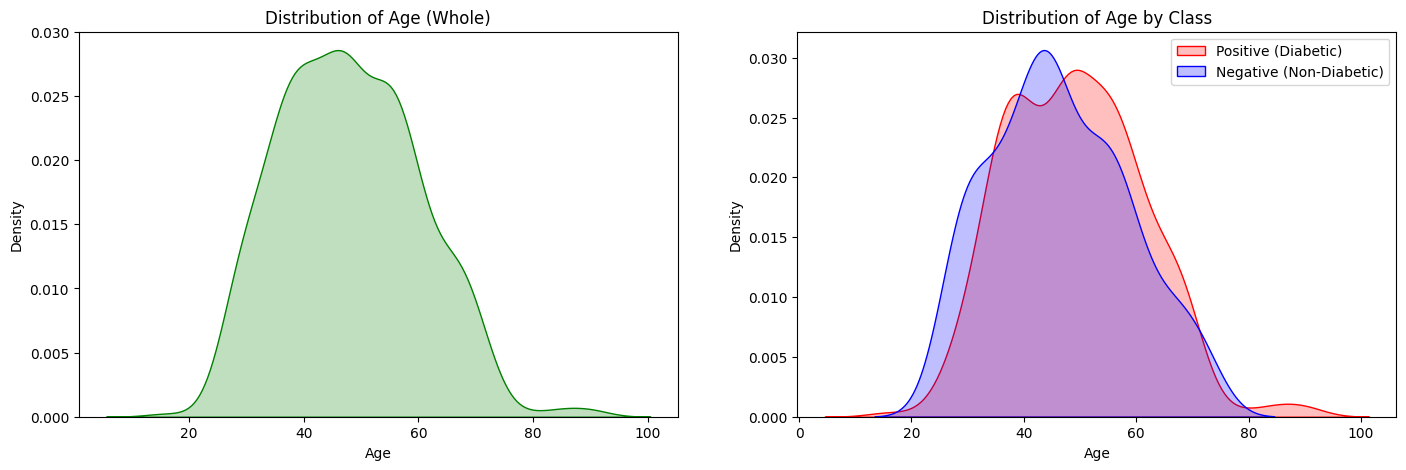

In [28]:
# Check the distribution of Age using kdeplot

# Prepare the template
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]}, figsize=(17,5))

# The whole Age
sns.kdeplot(df['Age'], color='green', shade=True, ax=axs[0])
axs[0].set_title('Distribution of Age (Whole)')

# By class
sns.kdeplot(df['Age'][df['class'] == 'Positive'], color='red', shade=True, ax=axs[1])
sns.kdeplot(df['Age'][df['class'] == 'Negative'], color='blue', shade=True, ax=axs[1])
axs[1].legend(['Positive (Diabetic)','Negative (Non-Diabetic)'])
axs[1].set_title('Distribution of Age by Class')

We can see that the Age in our dataset is quite normally distributed.

C:\Users\Joshia\AppData\Local\Temp\ipykernel_4056\4087836099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['class'], y=df['Age'], palette=['orangered','royalblue'], ax=axs[1])


Text(0.5, 1.0, 'Distribution of Age by Class')

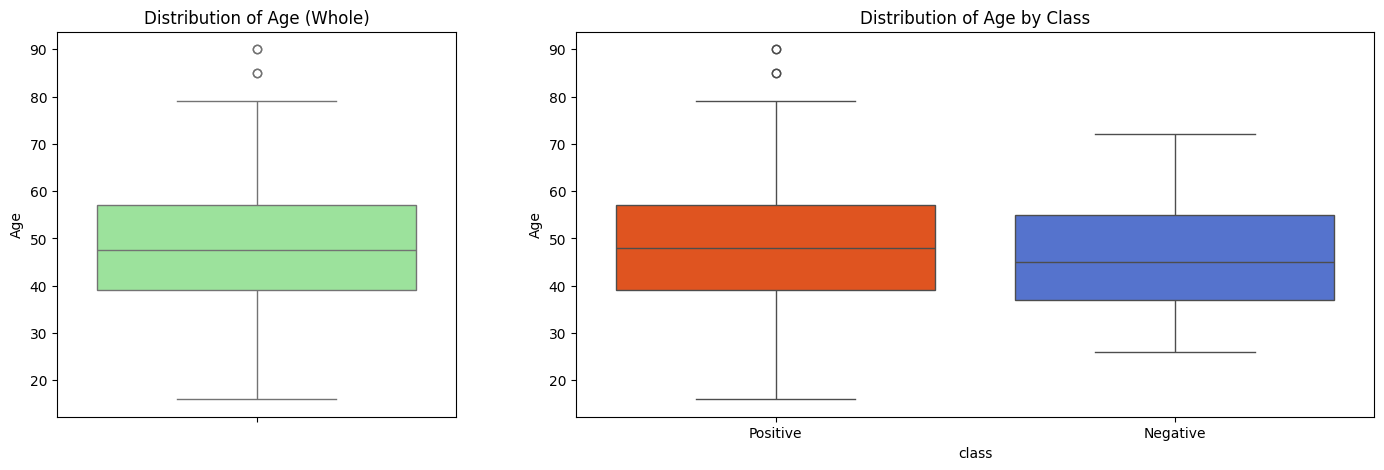

In [29]:
# Check the distribution of age using the boxplot

# Prepare the template
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,2]}, figsize=(17,5))

# The whole Age
sns.boxplot(df['Age'], color='lightgreen', ax=axs[0])
axs[0].set_title('Distribution of Age (Whole)')

# By class
sns.boxplot(data=df, x=df['class'], y=df['Age'], palette=['orangered','royalblue'], ax=axs[1])
axs[1].set_title('Distribution of Age by Class')

By using the boxplot, we can catch the outliers in Age column.

Let's check the summary statistics of Age column by class.

In [30]:
df.groupby('class')['Age'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,200.0,46.360,12.081,26.0,37.0,45.0,55.0,72.0
Positive,320.0,49.072,12.097,16.0,39.0,48.0,57.0,90.0


Next, let's check the association between Age and class using Mann Whitney U test.

In [31]:
# Split the age data by class
age_diabetic = df[df['class']=='Positive']['Age']
age_nondiabetic = df[df['class']=='Negative']['Age']

# Perform the test
test_statistic, p_value = mannwhitneyu(age_diabetic, age_nondiabetic)

print('========== Testing H0 vs H1 ==========')
print('H0: There is no difference in age between Diabetic and Non-Diabetic groups.')
print('H1: There is a statistically difference between Diabetic and Non-Diabetic groups.')
print()

# Print the result
print(f'Test statistic:', test_statistic)
print(f'p-value:', p_value)
print()

# Determine whether to reject the null hypothesis or not
if p_value < 0.05:
    print('Reject the Null Hypothesis')
else:
    print("Do not reject the Null Hypothesis as there isn't enough evidence to reject it.")

========== Testing H0 vs H1 ==========
H0: There is no difference in age between Diabetic and Non-Diabetic groups.
H1: There is a statistically difference between Diabetic and Non-Diabetic groups.

Test statistic: 36166.0
p-value: 0.012404478258019996

Reject the Null Hypothesis


## Conclusion
---
We can conclude that the 'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'partial paresis', 'muscle stiffness', and 'Alopecia' categorical features are quite associated to the 'class' target. In addition, the 'Age' numerical feature also influenced the 'class' target.

# Data Preparation

The next step is to prepare the data before going into machine learnind models. This includes transforming the string formatted data into numerical formatted data and splitting the data into train and test data.

In [32]:
# Encode the cateorical variables
mapper = {'Yes':1, 'No':0,
          'Positive':1, 'Negative':0,
          'Male':1, 'Female':0}

df = df.replace(mapper)

In [33]:
# Split the data into features and label
y = df['class']
X = df.drop(columns=['class'])

In [34]:
# Print the shape of X and y
print('The shape of features:', X.shape)
print('The shape of target:', y.shape)

The shape of features: (520, 16)
The shape of target: (520,)


In [35]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [36]:
# Check the shape of train and test sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (416, 16)
Shape of X_test: (104, 16)
Shape of y_train: (416,)
Shape of y_test: (104,)


In [67]:
X_test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
275,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
93,40,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
167,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
90,45,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,50,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1
357,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,66,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0
334,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0


# Machine Learning Models

Here comes the modeling part. Let's try a few popular machine learning models for classification task, such as Logistic Regression, SVM, and XGBoost.

## Logistic Regression

In [37]:
# Define the function to train logistic regression model

def train_lr(scoring, cv=5):

    # Define the logistic regression model
    model_lr = LogisticRegression()

    # Define the hyperparameters' space
    param_grid = {
        'penalty': ['l1','l2'],
        'C': [0.01, 0.1, 1.0, 10, 100],
        'solver': ['liblinear','saga']
    }

    # Create the GridSearchCV object
    grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the grid_search_lr to the train data
    grid_search_lr.fit(X_train, y_train)

    # Return the grid_search_lr
    return grid_search_lr

In [38]:
# Train the logistic regression model
scoring='accuracy'
grid_search_lr_result = train_lr(scoring=scoring, cv=5)

In [39]:
# Print the result
print('The best set of hyperparameters:', grid_search_lr_result.best_params_)
print(f'The corresponding best {scoring} score:', grid_search_lr_result.best_score_)

The best set of hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The corresponding best accuracy score: 0.918215720022949


In [40]:
# Predict on the test set
best_lr = grid_search_lr_result.best_estimator_
y_pred = best_lr.predict(X_test)

In [41]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104



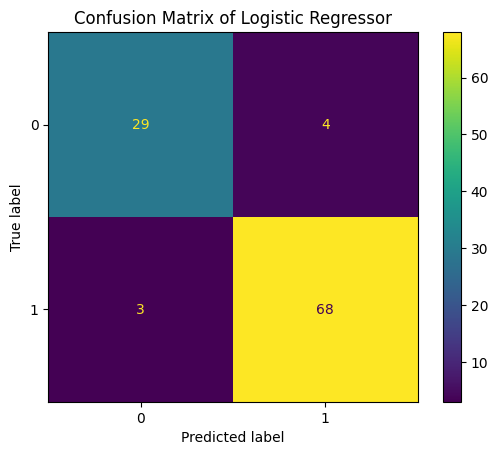

In [42]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_lr.classes_)
disp.plot()
plt.title('Confusion Matrix of Logistic Regressor')
plt.show()

In [43]:
# AUC Score
auc_score = round(roc_auc_score(y_test, best_lr.predict_proba(X_test)[:,1]), 3)
print('The AUC Score:', auc_score)

The AUC Score: 0.971


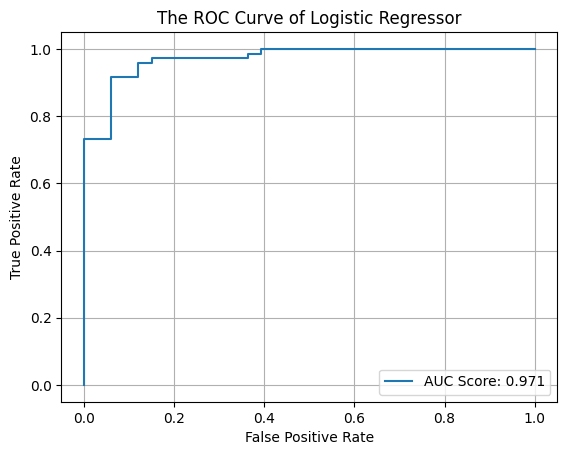

In [44]:
# ROC Curve
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, best_lr.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr_lr, tpr_lr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC Curve of Logistic Regressor')
plt.legend([f'AUC Score: {auc_score}'], loc='lower right')
plt.show()

In [45]:
# Try if threshold = 0.1
# y_probs = model_lr.predict_proba(X_test)[:,1]
# custom_threshold = 0.15
# y_pred_custom = (y_probs >= custom_threshold).astype(int)

# print(f'Confusion Matrix for Threshold = {custom_threshold}')
# print(confusion_matrix(y_test, y_pred_custom))
# print()

# print(f'Classification Report for Threshold = {custom_threshold}')
# print(classification_report(y_test, y_pred_custom))

## SVM

In [46]:
def train_svm(scoring, cv=5):

    # Define the SVM classifier
    model_svm = SVC(probability=True)

    # Define the hyperparameters space
    param_grid = {
        'C': [0.01, 0.1, 1.0, 10, 100],
        'kernel': ['linear','rbf','poly'],
        'degree': [2,3],
        'gamma': ['scale',2,3]
    }

    # Create the GridSearchCV object
    grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the grid_search_svm to the train data
    grid_search_svm.fit(X_train, y_train)

    # Return the trained model
    return grid_search_svm

In [47]:
# Train the svm classifier
grid_search_svm_result = train_svm(scoring='accuracy', cv=5)

In [48]:
# Print the result
print('The best set of hyperparameters:', grid_search_svm_result.best_params_)
print('The best corresponding accuracy score:', grid_search_svm_result.best_score_)

The best set of hyperparameters: {'C': 100, 'degree': 2, 'gamma': 2, 'kernel': 'poly'}
The best corresponding accuracy score: 0.9448651749856569


In [49]:
# Predict on the test set
best_svm = grid_search_svm_result.best_estimator_
y_pred = best_svm.predict(X_test)

In [50]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



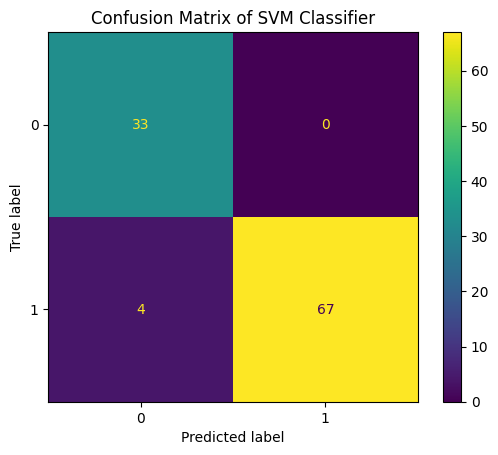

In [51]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm.classes_)
disp.plot()
plt.title('Confusion Matrix of SVM Classifier')
plt.show()

In [52]:
# AUC Score
auc_score = round(roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1]), 3)
print(f'The AUC Score: {auc_score}')

The AUC Score: 0.983


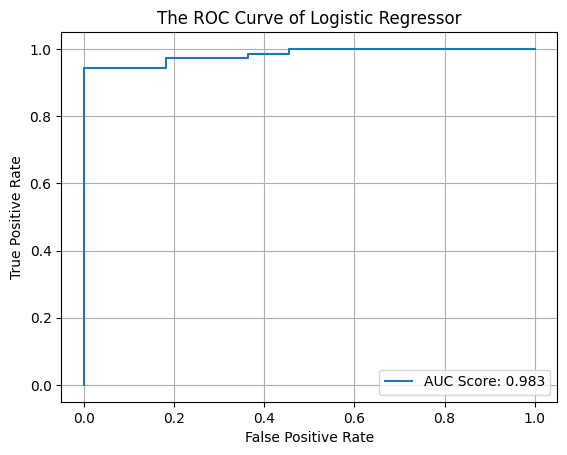

In [53]:
# ROC-AUC Curve
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, best_svm.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr_svm, tpr_svm)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC Curve of Logistic Regressor')
plt.legend([f'AUC Score: {auc_score}'], loc='lower right')
plt.show()

## XGBoost

In [46]:
def train_xgb(scoring, cv=5):

    # Define the XGB Classifier model
    model_xgb = XGBClassifier()

    # Define some hyperparameters
    param_grid = {
        'max_depth': [3,6,10],
        'eta': [0.05, 0.1, 0.15, 0.2]
    }

    # Create the GridSearchCV object
    grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the grid_search_xg to the train data
    grid_search_xgb.fit(X_train, y_train)

    # Return the grid_search_xgb 
    return grid_search_xgb

In [47]:
# Train the XGB classifier
grid_search_xgb_result = train_xgb(scoring='accuracy', cv=5)

In [48]:
# Print the result
print('The best set of hyperparameters:', grid_search_xgb_result.best_params_)
print('The best corresponding accuracy score:', grid_search_xgb_result.best_score_)

The best set of hyperparameters: {'eta': 0.1, 'max_depth': 6}
The best corresponding accuracy score: 0.9663798049340219


In [49]:
# Predict on the test set
best_xgb = grid_search_xgb_result.best_estimator_
y_pred = best_xgb.predict(X_test)

In [50]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



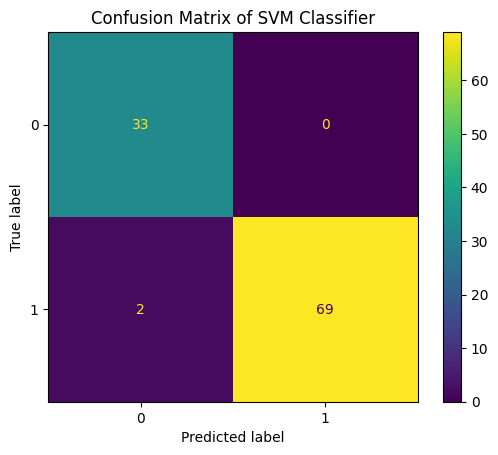

In [51]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_xgb.classes_)
disp.plot()
plt.title('Confusion Matrix of SVM Classifier')
plt.show()

In [52]:
# AUC Score
auc_score = round(roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:,1]), 3)

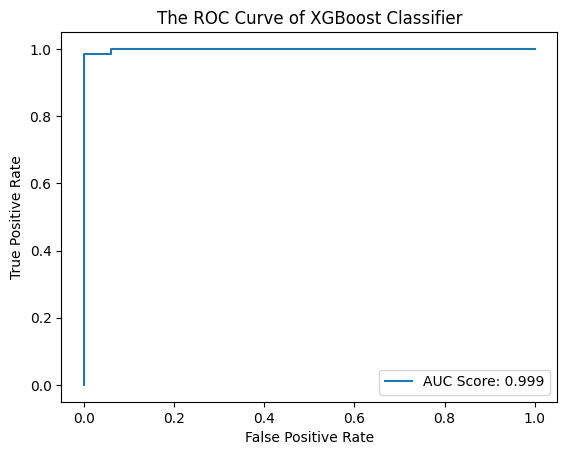

In [53]:
# ROC-AUC Curve
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, best_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr_xgb, tpr_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC Curve of XGBoost Classifier')
plt.legend([f'AUC Score: {auc_score}'], loc='lower right')
plt.show()

# Save the Model

Let's save the best one out of the three machine learning models that we tried before, which is the XGBoostClassifier model.

In [55]:
# Save the model into pickle format
with open('diabetes_xgb.pkl','wb') as f:
    pickle.dump(best_xgb, f)

In [2]:
# Testing load model from pickle format
with open('diabetes_xgb.pkl', 'rb') as f:
    diabetes_xgb = pickle.load(f)

In [3]:
diabetes_xgb.predict([[72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0]])

array([0])